In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [2]:
data = {
    'CustomerID': [1,2,3,4,5,6,7,8,9,10,
                   11,12,13,14,15,16,17,18,19,20],

    'Gender': ['Male','Male','Female','Female','Female','Female','Female','Female','Male','Female',
               'Male','Female','Male','Female','Male','Female','Male','Female','Male','Female'],

    'Age': [19,21,20,23,31,22,35,23,64,30,
            67,35,58,24,37,22,35,20,52,35],

    'Annual Income (k$)': [15,15,16,16,17,17,18,18,19,19,
                           19,19,20,20,20,20,21,21,23,23],

    'Spending Score (1-100)': [39,81,6,77,40,76,6,94,3,72,
                               14,99,15,77,13,79,35,66,29,98]
}

df = pd.DataFrame(data)


In [3]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [4]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


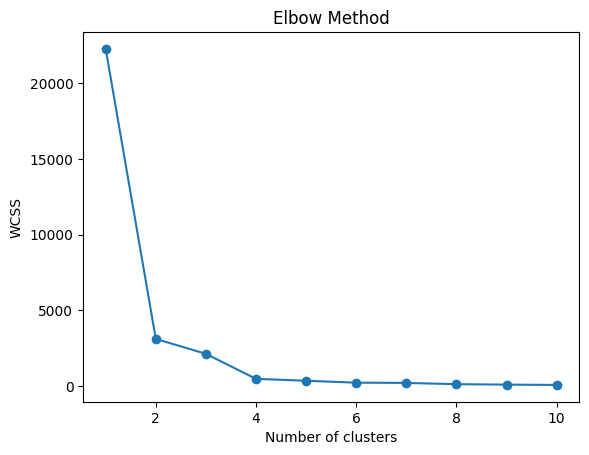

In [5]:
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [6]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X)


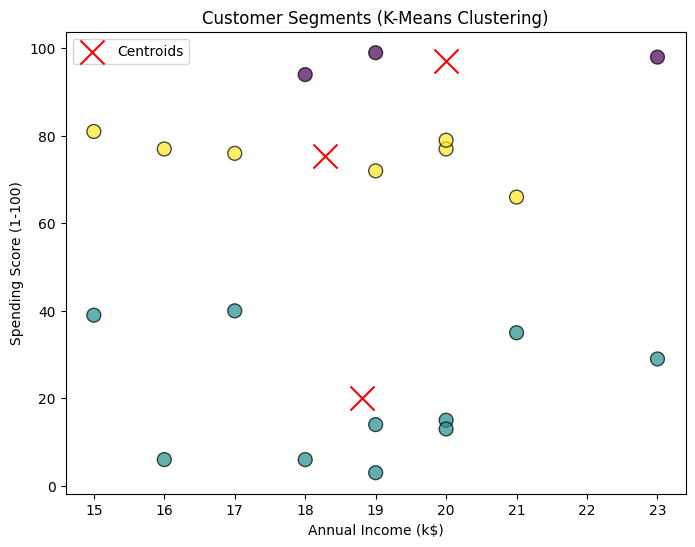

In [7]:
plt.figure(figsize=(8,6))

# Scatter plot of customers based on cluster
plt.scatter(X['Annual Income (k$)'],
            X['Spending Score (1-100)'],
            c=df['Cluster'], cmap='viridis',
            s=100, alpha=0.7, edgecolors='k')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            s=300, c='red', marker='x', label='Centroids')

plt.title('Customer Segments (K-Means Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
